In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 50.5 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

[Link to Maria Harris Rasmussen's thesis](https://sid.erda.dk/share_redirect/bdOQYSOOPj)

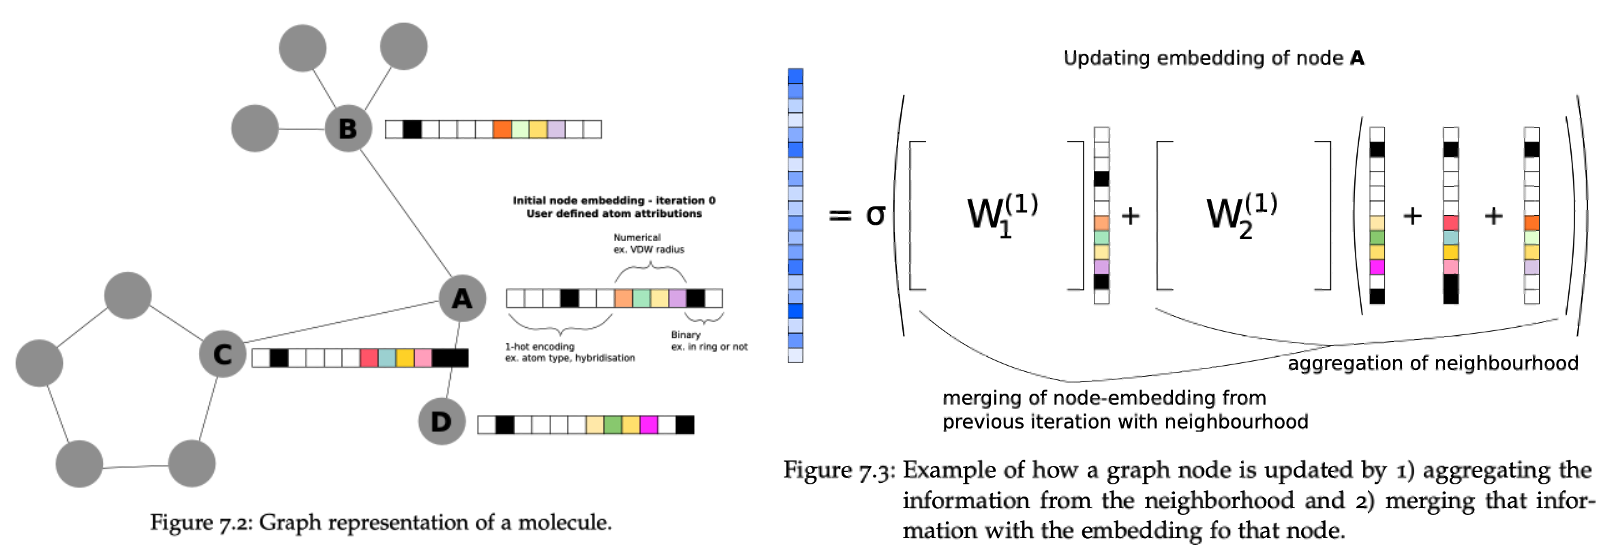

In [ ]:
def draw_mol(mol):
  dos = Draw.MolDrawOptions()
  dos.addAtomIndices=True
  return Draw.MolToImage(mol,options=dos)

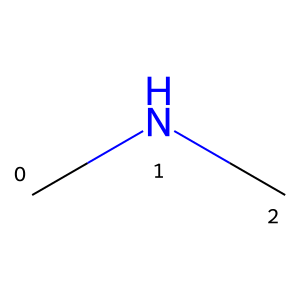

In [ ]:
mol = Chem.MolFromSmiles('CNC')
draw_mol(mol)

In [ ]:
# universally necessary to eliminate negatives
# (not really applicable here)
def relu(atom):
  return np.maximum(0,atom)

In [ ]:
# hard coding asf
C = np.array([1, 0, 0])
N = np.array([0, 1, 0])
O = np.array([0, 0, 1])
np.random.seed(0)
w1 = np.random.rand(4,3)
w2 = np.random.rand(4,3)
atom0 = relu(w1@C + w2@N)
atom1 = relu(w1@N + w2@(C + C))
atom2 = relu(w1@C + w2@N)
molecule = (atom0 + atom1 + atom2)/3
print("atom0 =", atom0)
print("atom1 =", atom1)
print("atom2 =", atom2)
print("molecule =", molecule)

atom0 = [1.47441014 0.56510158 1.30759936 0.84492088]
atom1 = [1.85127849 0.5979134  2.4480865  2.39004217]
atom2 = [1.47441014 0.56510158 1.30759936 0.84492088]
molecule = [1.60003292 0.57603885 1.68776174 1.35996131]


In [ ]:
# adjacency matrix creates an array for each of the atoms in molecule
# a 1 means it's bonded to the atom at that index
A = Chem.GetAdjacencyMatrix(mol)
print("Adjacency Matrix")
print(A)

# identity matrix creates an array for each of the atoms in molecule
# unique code for each atom at each position
I = np.eye(A.shape[0])
print("Identity Matrix")
print(I)

# creates a list of the specific atoms we have
features = np.array([C, N, C])
print("Features")
print(features)

# provides atomic embedding vectors for each atom faster
# important to use identity first for w1 and then adjacent second for w2
atoms = relu(w1@(I@features).T + w2@(A@features).T)

# uses same weight matrix for both identity and adjacent
# NOT SURE WHY WE ELIMINATED W2?
atoms = relu(w1@((I+A)@features).T)
print("Atomic Embedding Vector of Each Atom")
print(atoms)

# computes average vector of molecule
molecule = atoms.sum(axis=1)/3
print("Molecule Average Vector")
print(molecule)

Adjacency Matrix
[[0 1 0]
 [1 0 1]
 [0 1 0]]
Identity Matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Features
[[1 0 0]
 [0 1 0]
 [1 0 0]]
Atomic Embedding Vector of Each Atom
[[1.26400287 1.81281637 1.26400287]
 [0.96853798 1.51342117 0.96853798]
 [1.32936021 1.76694742 1.32936021]
 [1.17516656 1.55860808 1.17516656]]
Molecule Average Vector
[1.4469407  1.15016571 1.47522262 1.3029804 ]


In [ ]:
# simplifies process by making a function out of previous work
def get_atomic_embedding(mol, features, l_embed):
  np.random.seed(0)
  A = Chem.GetAdjacencyMatrix(mol)
  I = np.eye(A.shape[0])
  n_feat = features.shape[1]
  w = np.random.rand(l_embed, n_feat)
  return relu(w@((I+A)@features).T)

In [ ]:
# making coding easier
C = [1, 0, 0]
N = [0, 1, 0]
O = [0, 0, 1]
mol = Chem.MolFromSmiles('CNC')
features = np.array([C, N, C])
atoms = get_atomic_embedding(mol, features, 4)
print(atoms)

[[1.26400287 1.81281637 1.26400287]
 [0.96853798 1.51342117 0.96853798]
 [1.32936021 1.76694742 1.32936021]
 [1.17516656 1.55860808 1.17516656]]


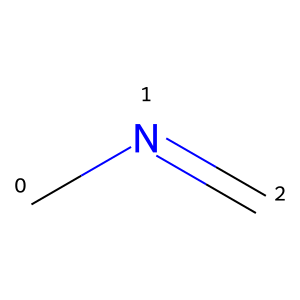

In [ ]:
mol = Chem.MolFromSmiles('CN=C')
draw_mol(mol)

In [ ]:
# here a problem is introduced because a double bond does not
# change the values anywhere
# this is because the feature vector is not sophisticated
# therefore we make the feature vector longer with hybridization
mol = Chem.MolFromSmiles('CN=C')
Csp3 = [1, 0, 0, 3]
Csp2 = [1, 0, 0, 2]
Nsp2 = [0, 1, 0, 2]
#Osp2 = [0, 0, 1]
features = np.array([Csp3, Nsp2, Csp2])
atoms = get_atomic_embedding(mol, features, 4)
print(atoms)
# notice that first and third carbons now have different values
# due to different hybridizations

[[3.98841879 5.62699866 3.4435356 ]
 [5.52841392 7.73561472 4.63664092]
 [3.99157888 6.01303148 3.46268396]
 [1.9292877  2.67159086 1.8421584 ]]


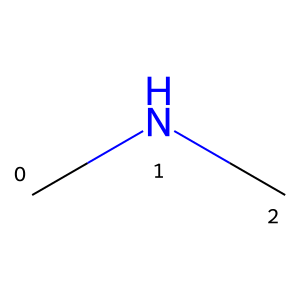

In [ ]:
mol = Chem.MolFromSmiles('CNC')
draw_mol(mol)

In [ ]:
# here we remove the double bond
# the values are not the same as before
# but the carbons are rightly identical with the more sophisticated code
mol = Chem.MolFromSmiles('CNC')
Csp3 = [1, 0, 0, 3]
Csp2 = [1, 0, 0, 2]
Nsp3 = [0, 1, 0, 3]
Nsp2 = [0, 1, 0, 2]
features = np.array([Csp3, Nsp3, Csp3])
atoms = get_atomic_embedding(mol, features, 4)
print("Atoms")
print(atoms)
atoms2 = get_atomic_embedding(mol, atoms.T, 4)
print("Atoms2")
print(atoms2)
# first and third still identical but we introduce this for the potential
# of neighbors being affected, as in the oxygen case

Atoms
[[4.53330197 6.71676502 4.53330197]
 [6.42018692 9.51916072 6.42018692]
 [4.5204738  7.07082132 4.5204738 ]
 [2.016417   2.84584946 2.016417  ]]
Atoms2
[[27.21001602 38.11309053 27.21001602]
 [24.46951613 34.31311996 24.46951613]
 [28.70182487 40.17761038 28.70182487]
 [22.39099174 31.40541833 22.39099174]]


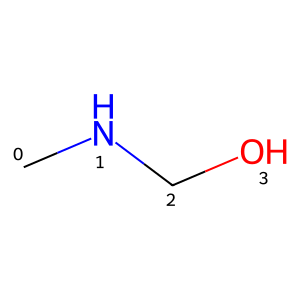

In [ ]:
mol = Chem.MolFromSmiles('CNCO')
draw_mol(mol)

In [ ]:
# here we increase the complexity of molecule by introducing a molecule
mol = Chem.MolFromSmiles('CNCO')
Csp3 = [1, 0, 0, 3]
Csp2 = [1, 0, 0, 2]
Nsp3 = [0, 1, 0, 3]
Nsp2 = [0, 1, 0, 2]
Osp3 = [0, 0, 1, 3]
features = np.array([Csp3, Nsp3, Csp3, Osp3])
atoms = get_atomic_embedding(mol, features, 4)
print("Atoms")
print(atoms)

# kind of alarming that the first two atoms, C and N, are identical
# to how they are without the oxygen present
# there should be some chemistry difference
# therefore we introduce the following code
atoms2 = get_atomic_embedding(mol, atoms.T, 4)
print("Atoms2")
print(atoms2)

# now we calculate the average vector
molecule = atoms2.sum(axis=1)/atoms2.shape[1]
print("Molecule Average Vector")
print(molecule)

Atoms
[[4.53330197 6.71676502 6.77071489 4.42087598]
 [6.42018692 9.51916072 9.53309313 6.21188002]
 [4.5204738  7.07082132 6.8988836  4.92875732]
 [2.016417   2.84584946 2.34884095 1.16185642]]
Atoms2
[[27.21001602 43.18208092 42.7518638  26.44492229]
 [24.46951613 38.6088269  37.84323848 23.21732618]
 [28.70182487 45.58620331 45.26926459 28.04322523]
 [22.39099174 35.75558083 35.45345527 22.07689013]]
Molecule Average Vector
[34.89722076 31.03472692 36.9001295  28.91922949]
